In [5]:
from models import DQN
import torch
from utils import convert_multiple_layers,print_layer_information,one_hot_action, one_hot_action_arr
from receptive_fields import plot_receptive_fields, plot_behavior_receptive_fields, fit_pca, fit_ep,compute_rfield
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rl_net=DQN("DemonAttack-v0")
PATH='C:/Users/koester_lab/Documents/Maria/UdacityMachineLearningEngineerNanoDegree/dqn_model.pth'
rl_net.net.load_state_dict(torch.load(PATH))
PATH='C:/Users/koester_lab/Documents/Maria/UdacityMachineLearningEngineerNanoDegree/dqn_target_model.pth'
rl_net.target_net.load_state_dict(torch.load(PATH))
rl_net.run_n_episodes(env=rl_net.env,n_epsiodes=3,epsilon=0.0)
inds=[3,5,7]
activations=rl_net.activations
ts=convert_multiple_layers(inds,activations)

In [3]:
imgs=rl_net.im_arr
actions=rl_net.actions_record
action_one_hot_arr=one_hot_action_arr(actions)

# Action Receptive Fields

In [7]:
rf_weights_actions=compute_rfield(imgs,action_one_hot_arr.T)

In [8]:
print(rf_weights_actions.shape)

(84, 84, 5)


In [9]:
rf_weights_actions=rf_weights_actions.reshape(84*84,-1)

# PCA

In [10]:
V=fit_pca(ts)


In [11]:
rf_weights_pca=compute_rfield(imgs,V)

In [12]:
rf_weights_pca=rf_weights_pca.reshape(84*84,-1)

# Correlation

In [20]:
corr_arr=[]
for j in range(0,100):
    V_corrs=[]
    for i in range(0,5):
        V_corrs.append(np.corrcoef(rf_weights_pca[:,j],rf_weights_actions[:,i])[0,1])
    corr_arr.append(V_corrs)
corr_arr=np.array(corr_arr)

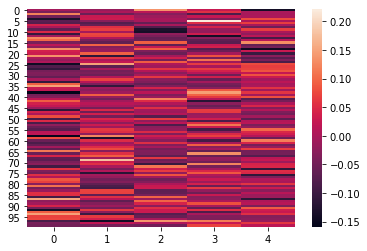

In [21]:
import seaborn as sns
sns.heatmap(corr_arr)